In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DEALING WITH LINEARLY INSEPERABLE DATASET:
XOR DATASET CREATION AND SVM IMPLEMENTATION
In this, linear regression and linear svm cannot be applied because the data is non-linear- hence cannot be seperated by linear classifiers

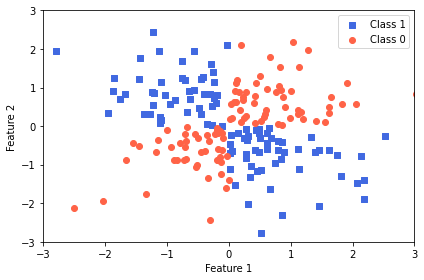

In [20]:
np.random.seed(1)
X_xor=np.random.randn(200,2)
X_xor
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c='royalblue',marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
 X_xor[y_xor == 0, 1],
 c='tomato', marker='o',
 label='Class 0')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


tO HANDLE THIS LINEARLY INSEPERALE DATA:
    we can create nonlinear combinations of the oriinal featres to project them onto a higher-dimensional space via a mapping functionwhere the data becomes linearly separable
    eg: transform a two-dimensional dataset into a new three-dimensional feature space
        𝜙𝜙(𝑥𝑥1, 𝑥𝑥2) = (𝑧𝑧1, 𝑧𝑧2, 𝑧𝑧3) = (𝑥𝑥1, 𝑥𝑥2, 𝑥𝑥1^2 + 𝑥𝑥2
^2)
   This will allow us to separate the two classes shown in the plot via a linear hyperplane that becomes a
nonlinear decision boundary if we project it back onto the original feature space,    

Solving a nonlinear problem using SVM:
1. transform the training data into a higher dimnsional feature space via a mapping function
2. train a linear SVM to classify the data in this new feature space
3. use the same mapping function to transform the new data and classify it using linear SVM model

One problem that could occur in this mapping approach--dealing with high-dimensional data-- the construction of new features is computationally expensive--> use kernel trick

In [49]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None,
resolution=0.02):
# setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

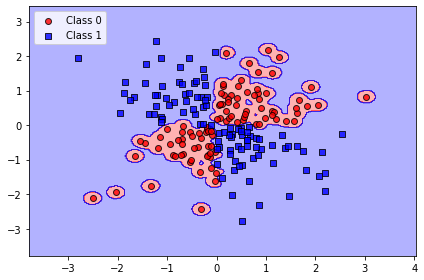

In [52]:
# scikit-learn
import matplotlib.pyplot as plt
from sklearn.svm import SVC


svm=SVC(kernel='rbf',random_state=1,gamma=100,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The decision boundary on the XOR data using a kernel method. 
When gamma is increased, 
Although the model fits the training dataset very well, such a classifier will likely have a high generalization
error on unseen data. This illustrates that the 𝛾𝛾 parameter also plays an important role in controlling
overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.